# Importing required Modules and Libraries

In [137]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [139]:
df=pd.read_csv('Heart-Disease.csv')

In [140]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3.0,2,0,0,2
1,44,1,4,130,209,0,1,127,0,0.0,0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0


In [141]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,num
172,54,0,4,127,333,1,1,154,0,0.0,0,0,0,1
173,62,1,1,0,139,0,1,0,0,0.0,0,0,0,0
174,55,1,4,122,223,1,1,100,0,0.0,0,0,6,2
175,58,1,4,0,385,1,2,0,0,0.0,0,0,0,0
176,62,1,2,120,254,0,2,93,1,0.0,0,0,0,1


This dataset is about heart disease, more specifically it's about coronary artery disease and angina. I will go through this dataset. First I want to test my Python skills. Second, I want to test some ideas with machine learning.

# Lets start the EDA process on this Dataset

In [142]:
df.shape

(177, 14)

this dataset has 200 rows and 14 columns

In [143]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slop          int64
ca            int64
thal          int64
num           int64
dtype: object

As we can see above all the variables' values are of either integer or continuous type.

Checking the names of all columns separately

In [144]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slop', 'ca', 'thal', 'num'],
      dtype='object')

# Statistical Summary

In [145]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,num
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.0,177.000000,177.000000
mean,59.689266,0.971751,3.491525,96.954802,184.016949,0.350282,0.774011,89.649718,0.474576,0.962147,1.056497,0.0,0.971751,1.531073
std,7.828383,0.166152,0.812674,63.071192,111.480557,0.478412,0.694788,57.834220,0.500770,1.125925,1.176075,0.0,2.312096,1.220281
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.0,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
50%,60.000000,1.000000,4.000000,124.000000,217.000000,0.000000,1.000000,112.000000,0.000000,0.500000,0.000000,0.0,0.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,258.000000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,0.0,0.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


Describe function is a function that allows analysis between the numerical values contained in the data set. Using this function count, mean, std, min, max, 25%, 50%, 75%.

As seen in this section, most values are generally categorized. This means that we need to integrate other values into this situation. These; age, trestbps, chol, thalach.

# Missing Values Detection

In [146]:
print('Data Show Info\n')
df.info()

Data Show Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
age         177 non-null int64
sex         177 non-null int64
cp          177 non-null int64
trestbps    177 non-null int64
chol        177 non-null int64
fbs         177 non-null int64
restecg     177 non-null int64
thalach     177 non-null int64
exang       177 non-null int64
oldpeak     177 non-null float64
slop        177 non-null int64
ca          177 non-null int64
thal        177 non-null int64
num         177 non-null int64
dtypes: float64(1), int64(13)
memory usage: 19.5 KB


In [147]:
#Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data.
print('Data Sum of Null Values \n')
df.isnull().sum()

Data Sum of Null Values 



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slop        0
ca          0
thal        0
num         0
dtype: int64

# Lets start the EDA process on this Dataset

In [148]:
df.sample(frac=0.01)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,num
127,41,1,4,150,171,0,0,128,1,1.5,2,0,0,0
61,65,1,4,136,248,0,0,140,1,4.0,3,0,0,4


In [149]:
#sample; random rows in dataset
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,num
73,35,1,3,0,161,0,1,0,0,0.0,0,0,0,0
7,60,1,3,180,0,0,1,140,1,1.5,2,0,0,0
55,60,1,4,142,216,0,0,110,1,2.5,2,0,0,2
149,67,1,4,140,219,0,1,122,1,2.0,2,0,7,3
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2


As you can see, we are making a single clue of the columns that the data set contains. This is the evaluation for this. Because it will be more effective in future analysis.

In [150]:
df=df.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','num':'Target'})

In [151]:
#New show columns
df.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'slop', 'Ca', 'Thal', 'Target'],
      dtype='object')

# Correlation Analysis

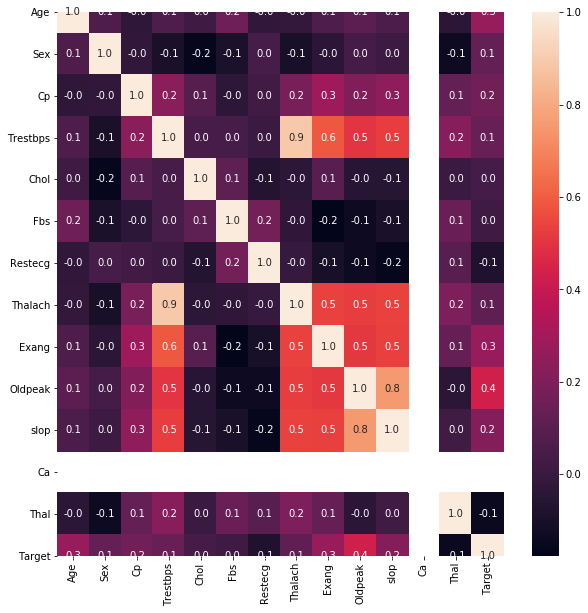

In [152]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

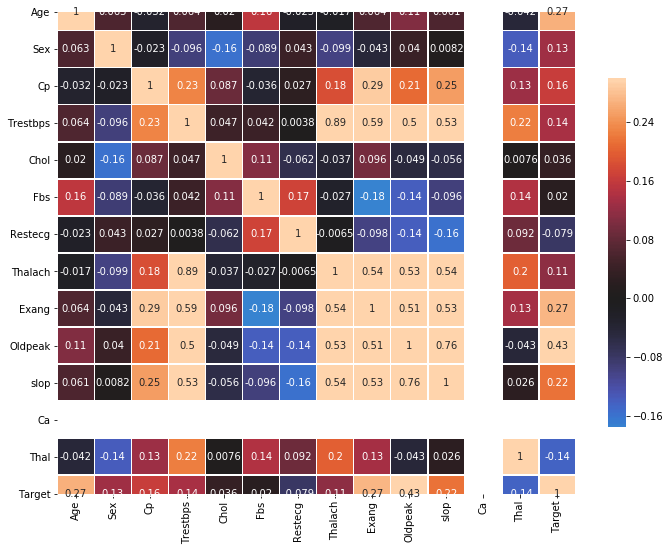

In [153]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

# Univariate and Bivariate Analysis

We will perform analysis on the training data. The relationship between the features found in the training data is observed. In this way, comments about the properties can be made

Age Analysis

In [154]:
df.Age.value_counts()[:10]
#data age show value counts for age least 10

62    14
63    13
55    13
58    11
61    10
57     9
60     9
69     8
64     8
56     8
Name: Age, dtype: int64

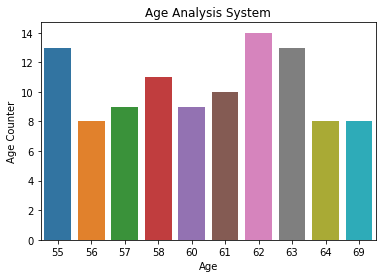

In [155]:
sns.barplot(x=df.Age.value_counts()[:10].index,y=df.Age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

In this section, the best analysis can be divided into the elderly,middle-aged, young people by looking at the age ranges

In [156]:
#firstly find min and max ages
minAge=min(df.Age)
maxAge=max(df.Age)
meanAge=df.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 35
Max Age : 77
Mean Age : 59.68926553672316


In [157]:
young_ages=df[(df.Age>=29)&(df.Age<40)]
middle_ages=df[(df.Age>=40)&(df.Age<55)]
elderly_ages=df[(df.Age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 3
Middle Ages : 33
Elderly Ages : 128


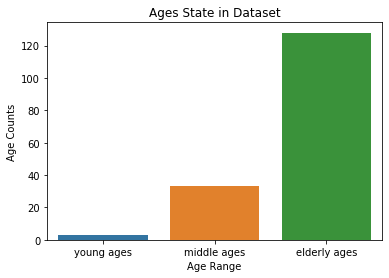

In [158]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

so,a new feature value can be removed from these age ranges will not affect this impact will see in the future.

In [159]:
df['AgeRange']=0
youngAge_index=df[(df.Age>=29)&(df.Age<40)].index
middleAge_index=df[(df.Age>=40)&(df.Age<55)].index
elderlyAge_index=df[(df.Age>55)].index

In [160]:
for index in elderlyAge_index:
    df.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    df.loc[index,'AgeRange']=1

for index in youngAge_index:
    df.loc[index,'AgeRange']=0

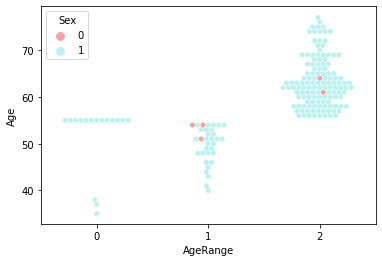

In [161]:
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="AgeRange", y="Age",hue='Sex',
              palette=["r", "c", "y"], data=df)
plt.show()

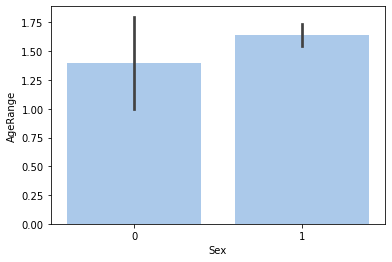

In [162]:
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y="AgeRange", x="Sex", data=df,
            label="Total", color="b")
plt.show()

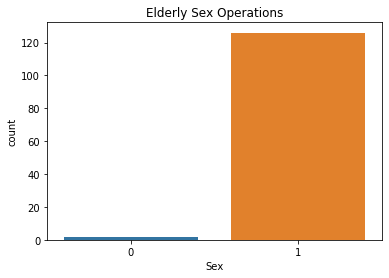

In [163]:
sns.countplot(elderly_ages.Sex)
plt.title("Elderly Sex Operations")
plt.show()

In [164]:
elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum')

Sex
0      260
1    11483
Name: Thalach, dtype: int64

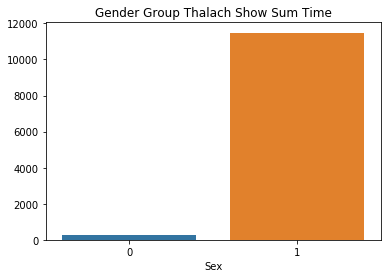

In [165]:
sns.barplot(x=elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum').index,y=elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum').values)
plt.title("Gender Group Thalach Show Sum Time")
plt.show()

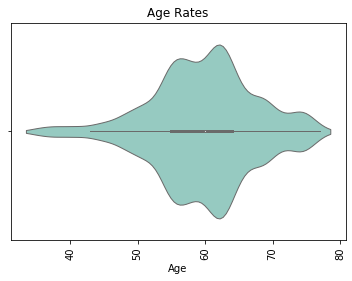

In [166]:
sns.violinplot(df.Age, palette="Set3", bw=.2, cut=1, linewidth=1)
plt.xticks(rotation=90)
plt.title("Age Rates")
plt.show()

No handles with labels found to put in legend.


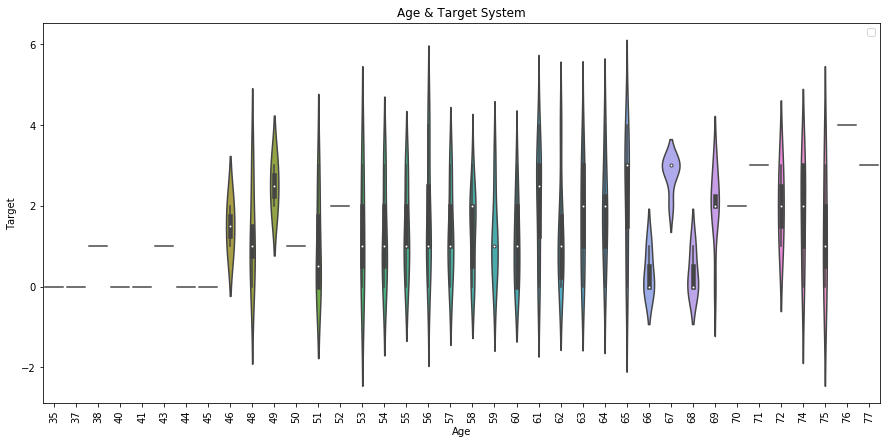

In [167]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df.Age,y=df.Target)
plt.xticks(rotation=90)
plt.legend()
plt.title("Age & Target System")
plt.show()

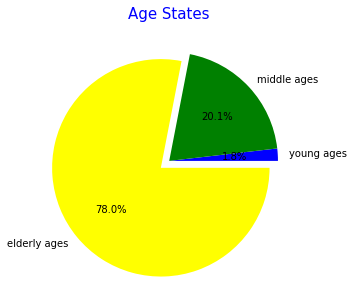

In [168]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize = (5,5))
#plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

Sex (Gender) Analysis

In [169]:
df.Sex.value_counts()

1    172
0      5
Name: Sex, dtype: int64

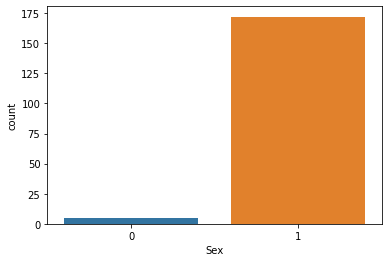

In [170]:
#Sex (1 = male; 0 = female)
sns.countplot(df.Sex)
plt.show()

In the above output, I wish it would be good if there was an equal proportion of people. At the moment it seems to be imbalance value, but for this situation it applies to Gender

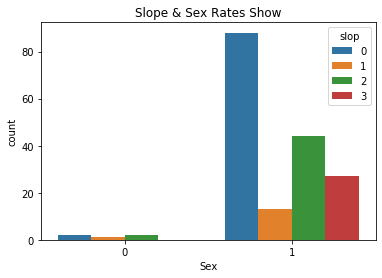

In [171]:
sns.countplot(df.Sex,hue=df.slop)
plt.title('Slope & Sex Rates Show')
plt.show()

In [172]:
total_genders_count=len(df.Sex)
male_count=len(df[df['Sex']==1])
female_count=len(df[df['Sex']==0])
print('Total Genders :',total_genders_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

Total Genders : 177
Male Count    : 172
Female Count  : 5


In [173]:
#Percentage ratios
print("Male State: {:.2f}%".format((male_count / (total_genders_count)*100)))
print("Female State: {:.2f}%".format((female_count / (total_genders_count)*100)))

Male State: 97.18%
Female State: 2.82%


Now, we are going to analyze both the sex and the heart health situation.

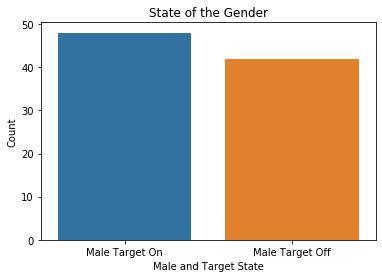

In [174]:
#Male State & target 1 & 0
male_andtarget_on=len(df[(df.Sex==1)&(df['Target']==1)])
male_andtarget_off=len(df[(df.Sex==1)&(df['Target']==0)])
####
sns.barplot(x=['Male Target On','Male Target Off'],y=[male_andtarget_on,male_andtarget_off])
plt.xlabel('Male and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

In this section, the rate of disease is seen less when the gender value is male. This is the result of an analysis for us

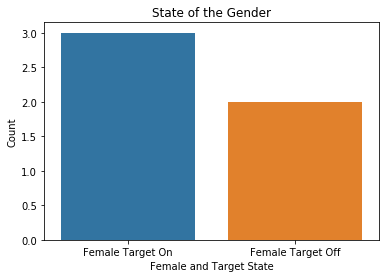

In [175]:
#Female State & target 1 & 0
female_andtarget_on=len(df[(df.Sex==0)&(df['Target']==1)])
female_andtarget_off=len(df[(df.Sex==0)&(df['Target']==0)])
####
sns.barplot(x=['Female Target On','Female Target Off'],y=[female_andtarget_on,female_andtarget_off])
plt.xlabel('Female and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

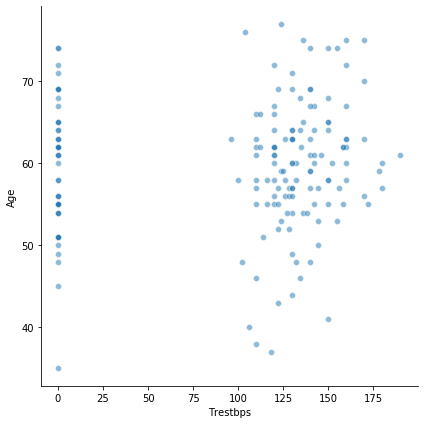

In [176]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Trestbps", y="Age",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

In the above analysis, the gender of people who are female is more common. In order to better understand this, we will make a more effective analysis in the following stages.

In [177]:
df.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,slop,Ca,Thal,Target,AgeRange
0,63,1,4,140,260,0,1,112,1,3.0,2,0,0,2,2
1,44,1,4,130,209,0,1,127,0,0.0,0,0,0,0,1
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1,0
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0,2


Chest Pain Type Analysis

A wide range of chest pain is present in cases of heart failure. These pains will be analyzed according to their problems and age ranges in the analysis system.

In [178]:
#As seen, there are 4 types of chest pain.
df.Cp.value_counts()

4    115
3     42
2     12
1      8
Name: Cp, dtype: int64

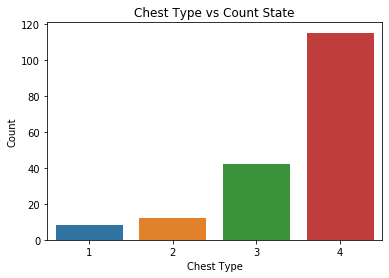

In [179]:
sns.countplot(df.Cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad    

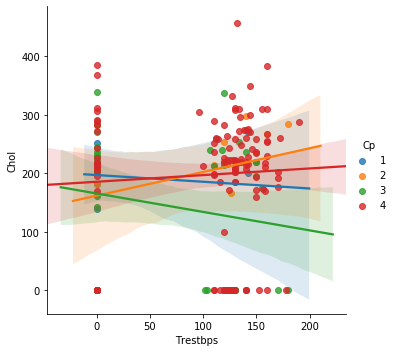

In [180]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Trestbps", y="Chol",data=df,hue="Cp")
plt.show()

As a result of the above analyzes, it can be seen that 0 cases with chest pain are less common with heart disease. But on the other hand, there are problems in all cases of chest pain, such as 1,2,3.

Age Range Analysis

In this section, age range analysis values are revealed. In this section we have used our new feature values.

In [181]:
target_0_agerang_0=len(df[(df.Target==0)&(df.AgeRange==0)])
target_1_agerang_0=len(df[(df.Target==1)&(df.AgeRange==0)])


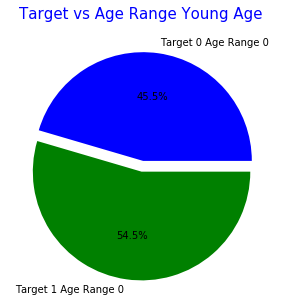

In [182]:
colors = ['blue','green']
explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Young Age ',color = 'blue',fontsize = 15)
plt.show()

In [183]:
target_0_agerang_1=len(df[(df.Target==0)&(df.AgeRange==1)])
target_1_agerang_1=len(df[(df.Target==1)&(df.AgeRange==1)])

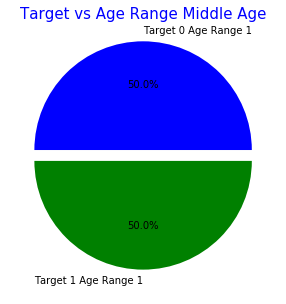

In [184]:
colors = ['blue','green']
explode = [0.1,0]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_1,target_1_agerang_1], explode=explode, labels=['Target 0 Age Range 1','Target 1 Age Range 1'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Middle Age',color = 'blue',fontsize = 15)
plt.show()

In [185]:
target_0_agerang_2=len(df[(df.Target==0)&(df.AgeRange==2)])
target_1_agerang_2=len(df[(df.Target==1)&(df.AgeRange==2)])

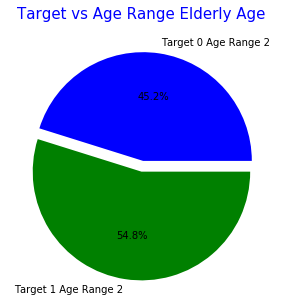

In [186]:
colors = ['blue','green']
explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_2,target_1_agerang_2], explode=explode, labels=['Target 0 Age Range 2','Target 1 Age Range 2'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Elderly Age ',color = 'blue',fontsize = 15)
plt.show()

Thalach Analysis

The analysis of the system we discussed in the case of maximum heart rate is shown.

In [187]:
df.Thalach.value_counts()[:20]
#First show 20 rows

0      48
120    12
140    11
110     8
112     6
130     5
118     4
100     4
150     4
105     4
108     3
128     3
102     3
148     3
160     3
135     3
117     2
119     2
84      2
125     2
Name: Thalach, dtype: int64

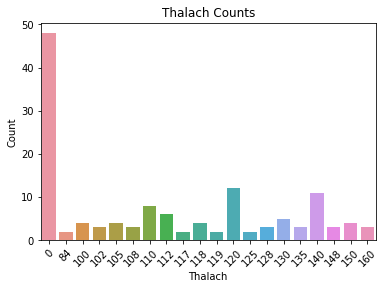

In [188]:
sns.barplot(x=df.Thalach.value_counts()[:20].index,y=df.Thalach.value_counts()[:20].values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()

In the analysis system, which will be carried out now, an analysis shall be carried out for all persons or their status in the target process

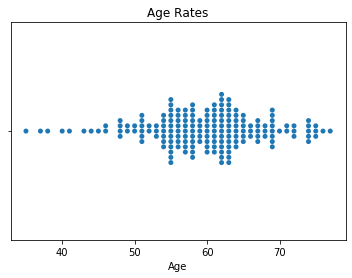

In [189]:
sns.swarmplot(x=df.Age)
plt.title('Age Rates')
plt.show()

In [190]:
age_unique=sorted(df.Age.unique())
age_thalach_values=df.groupby('Age')['Thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(df[df['Age']==age].Thalach)/age_thalach_values[i])

The transactions we perform in this section mean an average age. In this part, taking the average of all transactions is performed.

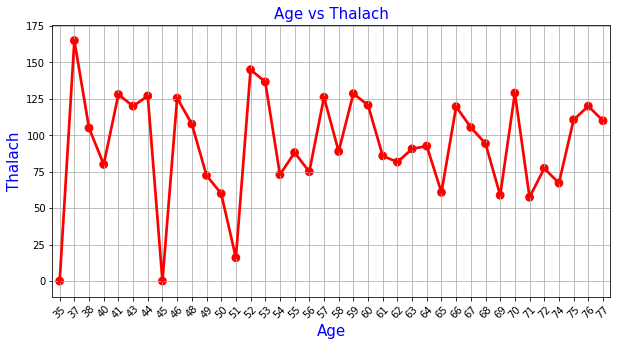

In [191]:
#data_sorted=data.sort_values(by='Age',ascending=True)
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

In this section we will use the groupby function. Our aim here is to obtain the average values of Thalach according to age ranges. Because we're going to do chest pain.

In [192]:
age_range_thalach=df.groupby('AgeRange')['Thalach'].mean()

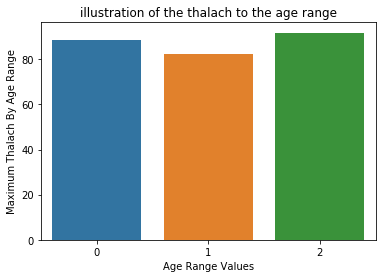

In [193]:
sns.barplot(x=age_range_thalach.index,y=age_range_thalach.values)
plt.xlabel('Age Range Values')
plt.ylabel('Maximum Thalach By Age Range')
plt.title('illustration of the thalach to the age range')
plt.show()
#As shown in this graph, this rate decreases as the heart rate 
#is faster and in old age areas.

In [194]:
cp_thalach=df.groupby('Cp')['Thalach'].mean()

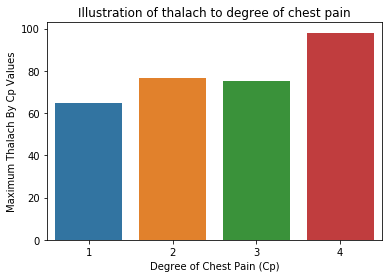

In [195]:
sns.barplot(x=cp_thalach.index,y=cp_thalach.values)
plt.xlabel('Degree of Chest Pain (Cp)')
plt.ylabel('Maximum Thalach By Cp Values')
plt.title('Illustration of thalach to degree of chest pain')
plt.show()
#As seen in this graph, it is seen that the heart rate is less 
#when the chest pain is low. But in cases where chest pain is 
#1, it is observed that the area is more. 2 and 3 were found to 
#be of the same degree.

Thal Analysis

3 = normal; 6 = fixed defect; 7 = reversable defect

In [196]:
df.Thal.value_counts()

0    149
7     16
6      8
3      4
Name: Thal, dtype: int64

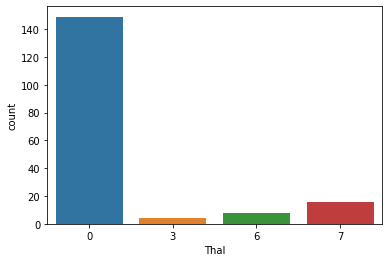

In [197]:
sns.countplot(df.Thal)
plt.show()

According to the analysis, Thal values are observed. Of these values, 0 is only 2. 1 showed a distribution of 18. In order to better understand this distribution, we need to take a look at the data set.

In [198]:
df[(df.Thal==0)]
#as seen, only 50% was understood to be 50% target.

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,slop,Ca,Thal,Target,AgeRange
0,63,1,4,140,260,0,1,112,1,3.0,2,0,0,2,2
1,44,1,4,130,209,0,1,127,0,0.0,0,0,0,0,1
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1,0
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,62,1,4,158,170,0,1,138,1,0.0,0,0,0,1,2
172,54,0,4,127,333,1,1,154,0,0.0,0,0,0,1,1
173,62,1,1,0,139,0,1,0,0,0.0,0,0,0,0,2
175,58,1,4,0,385,1,2,0,0,0.0,0,0,0,0,2


Another issue I am curious about in this section is the situation in which the value of the target is 1 and it is the maximum value of Thal.

In [199]:
#Target 1
a=len(df[(df['Target']==1)&(df['Thal']==0)])
b=len(df[(df['Target']==1)&(df['Thal']==1)])
c=len(df[(df['Target']==1)&(df['Thal']==2)])
d=len(df[(df['Target']==1)&(df['Thal']==3)])
print('Target 1 Thal 0: ',a)
print('Target 1 Thal 1: ',b)
print('Target 1 Thal 2: ',c)
print('Target 1 Thal 3: ',d)

#so,Apparently, there is a rate at Thal 2.Now, draw graph
print('*'*50)
#Target 0
e=len(df[(df['Target']==0)&(df['Thal']==0)])
f=len(df[(df['Target']==0)&(df['Thal']==1)])
g=len(df[(df['Target']==0)&(df['Thal']==2)])
h=len(df[(df['Target']==0)&(df['Thal']==3)])
print('Target 0 Thal 0: ',e)
print('Target 0 Thal 1: ',f)
print('Target 0 Thal 2: ',g)
print('Target 0 Thal 3: ',h)

Target 1 Thal 0:  38
Target 1 Thal 1:  0
Target 1 Thal 2:  0
Target 1 Thal 3:  1
**************************************************
Target 0 Thal 0:  37
Target 0 Thal 1:  0
Target 0 Thal 2:  0
Target 0 Thal 3:  2


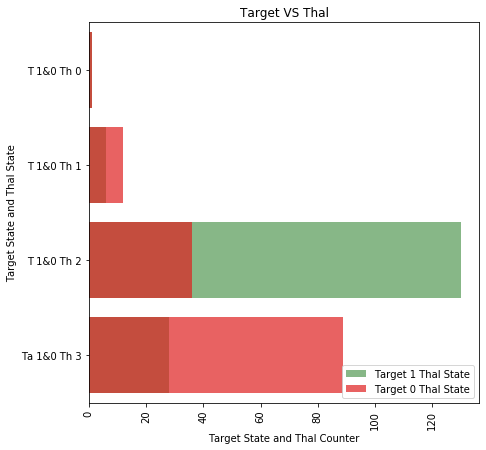

In [200]:
f,ax=plt.subplots(figsize=(7,7))
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1','T 1&0 Th 2','Ta 1&0 Th 3'],x=[1,6,130,28],color='green',alpha=0.5,label='Target 1 Thal State')
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1','T 1&0 Th 2','Ta 1&0 Th 3'],x=[1,12,36,89],color='red',alpha=0.7,label='Target 0 Thal State')
ax.legend(loc='lower right',frameon=True)
ax.set(xlabel='Target State and Thal Counter',ylabel='Target State and Thal State',title='Target VS Thal')
plt.xticks(rotation=90)
plt.show()
#so, there has been a very nice graphic display. This is the situation that best describes the situation.

Target Analysis

We will analyze this feature for people who are sick or not.

In [201]:
df.Target.unique()
#only two values are shown.
#A value of 1 is the value of patient 0.

array([2, 0, 1, 3, 4], dtype=int64)

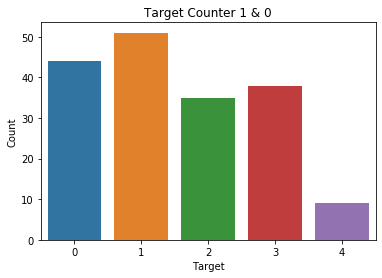

In [202]:
sns.countplot(df.Target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counter 1 & 0')
plt.show()

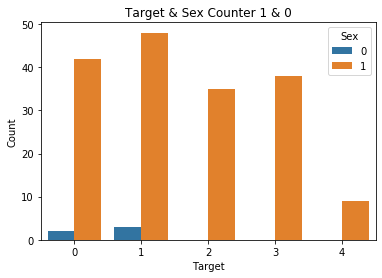

In [203]:
sns.countplot(df.Target,hue=df.Sex)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target & Sex Counter 1 & 0')
plt.show()

In [204]:
#determine the age ranges of patients with and without sickness and make analyzes about them
age_counter_target_1=[]
age_counter_target_0=[]
for age in df.Age.unique():
    age_counter_target_1.append(len(df[(df['Age']==age)&(df.Target==1)]))
    age_counter_target_0.append(len(df[(df['Age']==age)&(df.Target==0)]))

#now, draw show on graph

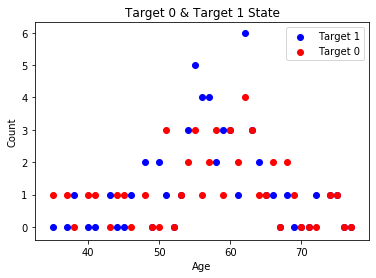

In [205]:
#Target 1 & 0 show graph on scatter
plt.scatter(x=df.Age.unique(),y=age_counter_target_1,color='blue',label='Target 1')
plt.scatter(x=df.Age.unique(),y=age_counter_target_0,color='red',label='Target 0')
plt.legend(loc='upper right',frameon=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Target 0 & Target 1 State')
plt.show()

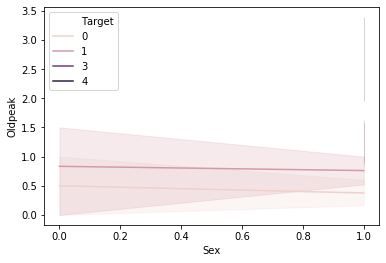

In [206]:
sns.lineplot(x="Sex", y="Oldpeak",
             hue="Target",data=df)
plt.show()

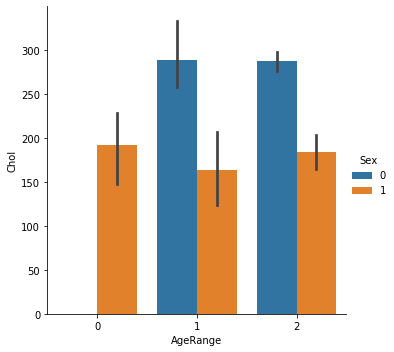

In [207]:
g = sns.catplot(x="AgeRange", y="Chol",
                 hue="Sex",
                 data=df, kind="bar")
plt.show()

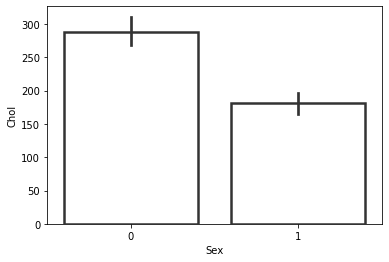

In [208]:
ax = sns.barplot("Sex", "Chol", data=df,
                  linewidth=2.5, facecolor=(1, 1, 1, 0),
                  errcolor=".2", edgecolor=".2")
plt.show()

In [209]:
male_young_t_1=df[(df['Sex']==1)&(df['AgeRange']==0)&(df['Target']==1)]
male_middle_t_1=df[(df['Sex']==1)&(df['AgeRange']==1)&(df['Target']==1)]
male_elderly_t_1=df[(df['Sex']==1)&(df['AgeRange']==2)&(df['Target']==1)]
print(len(male_young_t_1))
print(len(male_middle_t_1))
print(len(male_elderly_t_1))

6
9
33


# MODEL, TRAINING and TESTING

As a result of our initial evaluations, we have used a number of artificial learning algorithms. These are logistic regression, support vector machine (SVM), k close neighborhood (kNN), GradientBoostingClassifier and RandomForestClassifier algorithms. The first algorithm is logistic regression algorithm. To implement this algorithm model, we need to separate dependent and independent variables within our data sets. In addition, we created a combination of features between different features to make different experiments. While creating these parameters, the process of finding the best results was made by giving hyper parameter values.

As is known, most of our data are categorized and not categorized only among certain feature values. We will perform scale operations to eliminate these situations. There are many scale operations for this. These are as follows.

Z-score

Normalization

In a data set, the data that are distant from each other are made to scale between each other by making a specific scaling. As a result of this operation, the data takes a value of 0.1. This may change in some scaling operations. Standard and Normalization scale will be used for our operation. There is a big change between the data obtained. Therefore, we need to use this method for SVM algorithm.

In [210]:
#Let's see how the correlation values between them
df.corr()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,slop,Ca,Thal,Target,AgeRange
Age,1.000000,0.063105,-0.032121,0.064080,0.020430,0.156664,-0.023430,-0.017359,0.063919,0.106246,0.060545,NaN,-0.042238,0.267775,0.661843
Sex,0.063105,1.000000,-0.022822,-0.095548,-0.159176,-0.089248,0.042823,-0.098597,-0.042825,0.039809,0.008214,NaN,-0.135201,0.130459,0.061742
Cp,-0.032121,-0.022822,1.000000,0.229787,0.087458,-0.036163,0.026777,0.183204,0.289169,0.209220,0.250185,NaN,0.128387,0.164988,-0.022244
Trestbps,0.064080,-0.095548,0.229787,1.000000,0.046675,0.042331,0.003785,0.890440,0.587319,0.502194,0.526497,NaN,0.224495,0.138143,0.132496
Chol,0.020430,-0.159176,0.087458,0.046675,1.000000,0.109191,-0.061863,-0.037008,0.096136,-0.048706,-0.055565,NaN,0.007585,0.036103,0.001748
Fbs,0.156664,-0.089248,-0.036163,0.042331,0.109191,1.000000,0.171129,-0.026959,-0.176064,-0.137686,-0.095963,NaN,0.142549,0.020180,0.051006
Restecg,-0.023430,0.042823,0.026777,0.003785,-0.061863,0.171129,1.000000,-0.006506,-0.098259,-0.138103,-0.158122,NaN,0.091501,-0.078791,0.003942
Thalach,-0.017359,-0.098597,0.183204,0.890440,-0.037008,-0.026959,-0.006506,1.000000,0.536059,0.525388,0.536586,NaN,0.199591,0.114316,0.043624
Exang,0.063919,-0.042825,0.289169,0.587319,0.096136,-0.176064,-0.098259,0.536059,1.000000,0.510709,0.533064,NaN,0.134327,0.273267,0.190935
Oldpeak,0.106246,0.039809,0.209220,0.502194,-0.048706,-0.137686,-0.138103,0.525388,0.510709,1.000000,0.756384,NaN,-0.042755,0.431150,0.083293


All correlation values between the data are listed in the previous sections. As a result of this listing, it is aimed to ensure that these properties are used in different places by performing different operations. Thus, the p-value process determines a hypothesis and a hypothesis thesis is presented between each characteristic according to this hypothesis. In this process, after determining the Class property as hypothesis, the relations between all the other properties are checked. This results in a different number for each property. What is important here is that these numbers are not close to 1.00. If the number is close to 1.00 this is very bad.



We have shown the P-value. The purpose of this value is to see the integration values between our data. The scale methods that we will do for this situation will increase this situation even higher.

//resim z-score

X is the incoming data.
μ is the average value.
The value of σ is the standard deviation.
//sigma resim

Theoretically, it is understood that there is no big difference between standard and normalization. But when it comes to advice and usage, standard scaling comes out with a big difference. The reason for this is that the parsing process between the data is better. In the normalization system, the largest and smallest values within a group of data are considered. All other data is normalized according to these values. The aim here is to normalize the smallest value to 0 and the maximum value to 1, and all other data is a value between 0-1.

//X normalization işlemi resim

Of course, we need to remove the target property when doing this.

In [211]:
X=df.drop('Target',axis=1)
Y=df['Target']

In [706]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=10)

In [707]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (141, 14)
X_test (36, 14)
y_train (141,)
y_test (36,)


The difference in value between our data is too big. It increases both the volume and the results are very bad. To reduce this situation we need to use the StandardScaler function. A value of -1.1 will be obtained after using it.

# Using Standard Scaling for making Data Standardized

In [708]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Model Selection

In [709]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [710]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]


In [711]:
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n ')

0.3333333333333333
[[4 3 2 1 0]
 [1 5 0 4 0]
 [2 6 0 1 0]
 [0 1 1 3 0]
 [0 0 1 1 0]]
              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.33      0.50      0.40        10
           2       0.00      0.00      0.00         9
           3       0.30      0.60      0.40         5
           4       0.00      0.00      0.00         2

    accuracy                           0.33        36
   macro avg       0.24      0.30      0.25        36
weighted avg       0.29      0.33      0.30        36


 
0.3333333333333333
[[6 4 0 0 0]
 [4 6 0 0 0]
 [3 6 0 0 0]
 [1 4 0 0 0]
 [0 2 0 0 0]]
              precision    recall  f1-score   support

           0       0.43      0.60      0.50        10
           1       0.27      0.60      0.37        10
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy

In [712]:
rfc=RandomForestClassifier(random_state=1,max_depth=3,n_estimators=100)

In [713]:
rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)

In [714]:
accuracy_score(y_test,pred)

0.3888888888888889

# Principle Component Analysis

In [715]:
pca=PCA().fit(X_train)

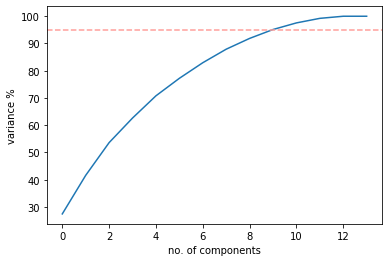

In [716]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('no. of components')
plt.ylabel('variance %')

plt.axhline(y=95,color='r',linestyle='--')
plt.show()

In [717]:
pca=PCA(9).fit(X_train)
X_train_transformed=pca.transform(X_train)
X_test_transformed=pca.transform(X_test)


In [718]:
X_train_transformed.shape

(141, 9)

In [719]:
X_test_transformed.shape

(36, 9)

In [720]:
rfc.fit(X_train_transformed,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [721]:
pred2=rfc.predict(X_test_transformed)

In [722]:
accuracy_score(rfc.predict(X_train_transformed),y_train)

0.723404255319149

In [723]:
accuracy_score(pred2,y_test)

0.2777777777777778

# Cross Validation on SVC and RFC

In [724]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train_transformed, y = y_train, cv = 10)
rfc_eval.mean()

0.4029503339797458

In [725]:
svc = SVC()
svc.fit(X_train_transformed, y_train)
pred_svc = svc.predict(X_test_transformed)

In [726]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.33      0.30      0.32        10
           1       0.24      0.40      0.30        10
           2       0.33      0.22      0.27         9
           3       0.25      0.20      0.22         5
           4       0.00      0.00      0.00         2

    accuracy                           0.28        36
   macro avg       0.23      0.22      0.22        36
weighted avg       0.28      0.28      0.27        36



In [727]:
rfc_eval = cross_val_score(estimator = svc, X = X_train_transformed, y = y_train, cv = 10)
rfc_eval.mean()

0.386927386339151

In [731]:
lr = LogisticRegression()
lr.fit(X_train_transformed, y_train)
pred_lr = lr.predict(X_test_transformed)

In [732]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.50      0.50      0.50        10
           2       0.00      0.00      0.00         9
           3       0.30      0.60      0.40         5
           4       0.00      0.00      0.00         2

    accuracy                           0.39        36
   macro avg       0.26      0.34      0.29        36
weighted avg       0.32      0.39      0.35        36



In [733]:
rfc_eval = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 7)
rfc_eval.mean()

0.37427602619995365

# Grid SearchCV on SVC

In [735]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [737]:
grid_svc.fit(X_train_transformed, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [738]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.4, 'gamma': 0.1, 'kernel': 'rbf'}

In [740]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.4, gamma =  0.1, kernel= 'rbf')
svc2.fit(X_train_transformed, y_train)
pred_svc2 = svc2.predict(X_test_transformed)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.44      0.40      0.42        10
           1       0.31      0.40      0.35        10
           2       0.33      0.33      0.33         9
           3       0.20      0.20      0.20         5
           4       0.00      0.00      0.00         2

    accuracy                           0.33        36
   macro avg       0.26      0.27      0.26        36
weighted avg       0.32      0.33      0.32        36



# Storing the predicted results in csv file.

In [741]:
pred_svc2 = pd.DataFrame(pred_svc2, columns=['pred_svc2']).to_csv('Heart-Disease.csv')

# Saving the best Model as a pickle in a file

In [742]:
from sklearn.externals import joblib

In [743]:
joblib.dump(svc,'Heart-Disease.pkl')

['Heart-Disease.pkl']